<a href="https://colab.research.google.com/github/robsonbfreitas/CalculadoraDeAluguel/blob/main/AnaliseDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
url = 'https://www.vivareal.com.br/venda/sp/sao-paulo/apartamento_residencial/'

In [3]:
c = requests.get(url).content

In [4]:
soup = BeautifulSoup(c)

In [5]:
aluguel_tag = soup.find_all('div', {'class':'property-card__price js-property-card-prices js-property-card__price-small'})

In [6]:
len(aluguel_tag)
paginas = ['']
for i in range(2,40):
    a = '?pagina='+str(i)
    print(a)
    paginas.append(a)


?pagina=2
?pagina=3
?pagina=4
?pagina=5
?pagina=6
?pagina=7
?pagina=8
?pagina=9
?pagina=10
?pagina=11
?pagina=12
?pagina=13
?pagina=14
?pagina=15
?pagina=16
?pagina=17
?pagina=18
?pagina=19
?pagina=20
?pagina=21
?pagina=22
?pagina=23
?pagina=24
?pagina=25
?pagina=26
?pagina=27
?pagina=28
?pagina=29
?pagina=30
?pagina=31
?pagina=32
?pagina=33
?pagina=34
?pagina=35
?pagina=36
?pagina=37
?pagina=38
?pagina=39


In [7]:
import pandas as pd

In [8]:
def converter_df(aluguel_lista,quartos_lista,endereco_lista,banheiro_lista,vaga_lista,area_lista):
    data = {'aluguel':aluguel_lista,
           'quartos':quartos_lista,
           'endereco':endereco_lista,
           'banheiro':banheiro_lista,
            'vaga':vaga_lista,
            'area':area_lista}
    df = pd.DataFrame(data)
    return df

In [9]:
def scrap(url):
    c = requests.get(url).content
    soup = BeautifulSoup(c)
    
    aluguel_tag = soup.find_all('div', {'class':'property-card__price js-property-card-prices js-property-card__price-small'}) 
    aluguel_lista = [p.text for p in aluguel_tag] 
    #print(len(aluguel_lista)) 
    
    quartos_tag = soup.find_all('li', {'class': 'property-card__detail-item property-card__detail-room js-property-detail-rooms'}) 
    quartos_lista = [en.text for en in quartos_tag] 
    #print(len(quartos_lista)) 
    
    endereco_tag = soup.find_all('span', {'class': 'property-card__address'}) 
    endereco_lista = [fg.text for fg in endereco_tag] 
    #print(len(endereco_lista)) 
    
    banheiro_tag = soup.find_all('li', {'class': 'property-card__detail-item property-card__detail-bathroom js-property-detail-bathroom'}) 
    banheiro_lista = [yp.text for yp in banheiro_tag] 
    #print(len(banheiro_lista))

    vaga_tag = soup.find_all('li', {'class': 'property-card__detail-item property-card__detail-garage js-property-detail-garages'}) 
    vaga_lista = [yp.text for yp in vaga_tag] 

    area_tag = soup.find_all('li', {'class': 'property-card__detail-item property-card__detail-area'}) 
    area_lista = [yp.text for yp in area_tag] 


    ### Vamos ter criar uma função para transformar listas em df
    df=converter_df(aluguel_lista,quartos_lista,endereco_lista,banheiro_lista,vaga_lista,area_lista)
    
    return df


In [10]:
URL = 'https://www.vivareal.com.br/aluguel/sp/sao-paulo/apartamento_residencial/{}'

In [11]:
df_lista = []
for pg in paginas:
    url = URL.format(pg)
    print('Coletando URL:', url)
    try:
        df = scrap(url)
    except Exception as e:
        print('Erro ao coletar dados na url:', url)
        print(e)
    df_lista.append(df)

Coletando URL: https://www.vivareal.com.br/aluguel/sp/sao-paulo/apartamento_residencial/
Coletando URL: https://www.vivareal.com.br/aluguel/sp/sao-paulo/apartamento_residencial/?pagina=2
Coletando URL: https://www.vivareal.com.br/aluguel/sp/sao-paulo/apartamento_residencial/?pagina=3
Coletando URL: https://www.vivareal.com.br/aluguel/sp/sao-paulo/apartamento_residencial/?pagina=4
Coletando URL: https://www.vivareal.com.br/aluguel/sp/sao-paulo/apartamento_residencial/?pagina=5
Coletando URL: https://www.vivareal.com.br/aluguel/sp/sao-paulo/apartamento_residencial/?pagina=6
Coletando URL: https://www.vivareal.com.br/aluguel/sp/sao-paulo/apartamento_residencial/?pagina=7
Coletando URL: https://www.vivareal.com.br/aluguel/sp/sao-paulo/apartamento_residencial/?pagina=8
Coletando URL: https://www.vivareal.com.br/aluguel/sp/sao-paulo/apartamento_residencial/?pagina=9
Coletando URL: https://www.vivareal.com.br/aluguel/sp/sao-paulo/apartamento_residencial/?pagina=10
Coletando URL: https://www.v

In [12]:
df_final = pd.concat(df_lista)

In [13]:
df_final.head()

,aluguel,quartos,endereco,banheiro,vaga,area
0,R$ 1.900 /Mês,2 Quartos,"Rua Cônego Vicente Miguel Marino, 29 - Barra F...",1 Banheiro,-- Vaga,33 m²
1,R$ 2.800 /Mês,1 Quarto,"Rua Almirante Brasil, 243 - Móoca, São Paulo - SP",2 Banheiros,1 Vaga,70 m²
2,R$ 2.690 /Mês,2 Quartos,"Rua Doutor Diogo de Faria, 929 - Vila Clementi...",2 Banheiros,1 Vaga,73 m²
3,R$ 3.600 /Mês,1 Quarto,"Rua Gomes de Carvalho, 1146 - Vila Olímpia, Sã...",1 Banheiro,1 Vaga,35 m²
4,R$ 1.050 /Mês,1 Quarto,"Centro, São Paulo - SP",1 Banheiro,-- Vaga,38 m²


In [14]:
df_final['bairro'] = df_final.endereco.str.split('\s-').str[1]
df_final['rua'] = df_final.endereco.str.split('\s-').str[0]
df_final['bairro'] = df_final.bairro.str.split(',').str[0]

In [15]:
df_final.head()

,aluguel,quartos,endereco,banheiro,vaga,area,bairro,rua
0,R$ 1.900 /Mês,2 Quartos,"Rua Cônego Vicente Miguel Marino, 29 - Barra F...",1 Banheiro,-- Vaga,33 m²,Barra Funda,"Rua Cônego Vicente Miguel Marino, 29"
1,R$ 2.800 /Mês,1 Quarto,"Rua Almirante Brasil, 243 - Móoca, São Paulo - SP",2 Banheiros,1 Vaga,70 m²,Móoca,"Rua Almirante Brasil, 243"
2,R$ 2.690 /Mês,2 Quartos,"Rua Doutor Diogo de Faria, 929 - Vila Clementi...",2 Banheiros,1 Vaga,73 m²,Vila Clementino,"Rua Doutor Diogo de Faria, 929"
3,R$ 3.600 /Mês,1 Quarto,"Rua Gomes de Carvalho, 1146 - Vila Olímpia, Sã...",1 Banheiro,1 Vaga,35 m²,Vila Olímpia,"Rua Gomes de Carvalho, 1146"
4,R$ 1.050 /Mês,1 Quarto,"Centro, São Paulo - SP",1 Banheiro,-- Vaga,38 m²,SP,"Centro, São Paulo"


In [16]:
df_final['quartos'] = df_final.quartos.str.extract('(.*) Quarto')
df_final['banheiro'] = df_final.banheiro.str.extract('(.*) Banheiro')
df_final['vaga'] = df_final.vaga.str.extract('(.*) Vaga')
df_final['area'] = df_final.area.str.extract('(.*)  m²')

In [17]:
df_final.head()

,aluguel,quartos,endereco,banheiro,vaga,area,bairro,rua
0,R$ 1.900 /Mês,2,"Rua Cônego Vicente Miguel Marino, 29 - Barra F...",1,--,33,Barra Funda,"Rua Cônego Vicente Miguel Marino, 29"
1,R$ 2.800 /Mês,1,"Rua Almirante Brasil, 243 - Móoca, São Paulo - SP",2,1,70,Móoca,"Rua Almirante Brasil, 243"
2,R$ 2.690 /Mês,2,"Rua Doutor Diogo de Faria, 929 - Vila Clementi...",2,1,73,Vila Clementino,"Rua Doutor Diogo de Faria, 929"
3,R$ 3.600 /Mês,1,"Rua Gomes de Carvalho, 1146 - Vila Olímpia, Sã...",1,1,35,Vila Olímpia,"Rua Gomes de Carvalho, 1146"
4,R$ 1.050 /Mês,1,"Centro, São Paulo - SP",1,--,38,SP,"Centro, São Paulo"


In [18]:
 df_final['aluguel'] = df_final.aluguel.str.extract('R\$ (.*) /Mês')
 df_final['aluguel'] = df_final['aluguel'].replace('\.', '', regex=True)

In [19]:
df_final.head()


,aluguel,quartos,endereco,banheiro,vaga,area,bairro,rua
0,1900,2,"Rua Cônego Vicente Miguel Marino, 29 - Barra F...",1,--,33,Barra Funda,"Rua Cônego Vicente Miguel Marino, 29"
1,2800,1,"Rua Almirante Brasil, 243 - Móoca, São Paulo - SP",2,1,70,Móoca,"Rua Almirante Brasil, 243"
2,2690,2,"Rua Doutor Diogo de Faria, 929 - Vila Clementi...",2,1,73,Vila Clementino,"Rua Doutor Diogo de Faria, 929"
3,3600,1,"Rua Gomes de Carvalho, 1146 - Vila Olímpia, Sã...",1,1,35,Vila Olímpia,"Rua Gomes de Carvalho, 1146"
4,1050,1,"Centro, São Paulo - SP",1,--,38,SP,"Centro, São Paulo"


In [63]:
df_teste = df_final

In [64]:
colunas = df_teste.drop(columns=['endereco','bairro','rua'])

In [65]:
colunas

,aluguel,quartos,banheiro,vaga,area
0,1900,2,1,--,33
1,2800,1,2,1,70
2,2690,2,2,1,73
3,3600,1,1,1,35
4,1050,1,1,--,38
...,...,...,...,...,...
31,3000,1,1,1,50
32,900,2,1,1,45
33,3500,4,3,1,110
34,2500,3,3,2,125


In [24]:
df_teste.head()

,aluguel,quartos,endereco,banheiro,vaga,area,bairro,rua
0,1900,2,"Rua Cônego Vicente Miguel Marino, 29 - Barra F...",1,--,33,Barra Funda,"Rua Cônego Vicente Miguel Marino, 29"
1,2800,1,"Rua Almirante Brasil, 243 - Móoca, São Paulo - SP",2,1,70,Móoca,"Rua Almirante Brasil, 243"
2,2690,2,"Rua Doutor Diogo de Faria, 929 - Vila Clementi...",2,1,73,Vila Clementino,"Rua Doutor Diogo de Faria, 929"
3,3600,1,"Rua Gomes de Carvalho, 1146 - Vila Olímpia, Sã...",1,1,35,Vila Olímpia,"Rua Gomes de Carvalho, 1146"
4,1050,1,"Centro, São Paulo - SP",1,--,38,SP,"Centro, São Paulo"


In [25]:
df_teste['endereco'].nunique()

40

In [27]:
df_teste = df_teste.drop_duplicates(subset=['endereco','aluguel'], keep='first', inplace=False)

In [28]:
df_teste.shape

(40, 8)

In [30]:
df_teste.to_csv('limpo.csv')

In [31]:
df_teste.describe()

,aluguel,quartos,endereco,banheiro,vaga,area,bairro,rua
count,40,40,40,40,40,40,40,40
unique,32,4,40,6,5,30,32,40
top,3000,1,"Rua Caramuru, 1164 - Jardim da Saude, São Paul...",1,1,47,Campo Belo,"Alameda Jaú, 310"
freq,3,15,1,18,24,3,3,1


In [32]:
cols = df_teste.columns.drop(['endereco','bairro','rua'])

In [33]:
cols

Index(['aluguel', 'quartos', 'banheiro', 'vaga', 'area'], dtype='object')

In [ ]:
df_teste[cols] = df_teste[cols].apply(pd.to_numeric, erros='coerce')

In [66]:
df_teste['vaga']

0       --  
1        1  
2        1  
3        1  
4       --  
       ...  
31       1  
32       1  
33       1  
34       2  
35       4  
Name: vaga, Length: 1404, dtype: object

In [34]:
df_teste.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 0 to 35
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aluguel   40 non-null     object
 1   quartos   40 non-null     object
 2   endereco  40 non-null     object
 3   banheiro  40 non-null     object
 4   vaga      40 non-null     object
 5   area      40 non-null     object
 6   bairro    40 non-null     object
 7   rua       40 non-null     object
dtypes: object(8)
memory usage: 2.8+ KB


In [35]:
df_teste.describe()

,aluguel,quartos,endereco,banheiro,vaga,area,bairro,rua
count,40,40,40,40,40,40,40,40
unique,32,4,40,6,5,30,32,40
top,3000,1,"Rua Caramuru, 1164 - Jardim da Saude, São Paul...",1,1,47,Campo Belo,"Alameda Jaú, 310"
freq,3,15,1,18,24,3,3,1


In [36]:
min(df_teste.aluguel)

'1050'

In [37]:
df_teste.head(20)

,aluguel,quartos,endereco,banheiro,vaga,area,bairro,rua
0,1900,2,"Rua Cônego Vicente Miguel Marino, 29 - Barra F...",1,--,33,Barra Funda,"Rua Cônego Vicente Miguel Marino, 29"
1,2800,1,"Rua Almirante Brasil, 243 - Móoca, São Paulo - SP",2,1,70,Móoca,"Rua Almirante Brasil, 243"
2,2690,2,"Rua Doutor Diogo de Faria, 929 - Vila Clementi...",2,1,73,Vila Clementino,"Rua Doutor Diogo de Faria, 929"
3,3600,1,"Rua Gomes de Carvalho, 1146 - Vila Olímpia, Sã...",1,1,35,Vila Olímpia,"Rua Gomes de Carvalho, 1146"
4,1050,1,"Centro, São Paulo - SP",1,--,38,SP,"Centro, São Paulo"
5,7500,3,"Rua José Maria Lisboa, 514 - Jardins, São Paul...",3,2,115,Jardins,"Rua José Maria Lisboa, 514"
6,4300,1,"Rua Gabriele D'Annunzio, 624 - Campo Belo, São...",1,1,53,Campo Belo,"Rua Gabriele D'Annunzio, 624"
7,3150,1,"Rua Castilho, 155 - Brooklin, São Paulo - SP",1,1,47,Brooklin,"Rua Castilho, 155"
8,2800,1,"Rua Vapabussu, 66 - Campo Belo, São Paulo - SP",2,1,47,Campo Belo,"Rua Vapabussu, 66"
9,8000,2,"Rua Professor Vahia de Abreu, 41 - Vila Olímpi...",3,2,98,Vila Olímpia,"Rua Professor Vahia de Abreu, 41"


In [58]:
df_teste.isnull().sum()

aluguel     0
quartos     0
endereco    0
banheiro    0
vaga        0
area        0
bairro      0
rua         0
dtype: int64

In [59]:
df_teste.isna().sum()

aluguel     0
quartos     0
endereco    0
banheiro    0
vaga        0
area        0
bairro      0
rua         0
dtype: int64

In [60]:
df_teste.isnull

TypeError: ignored

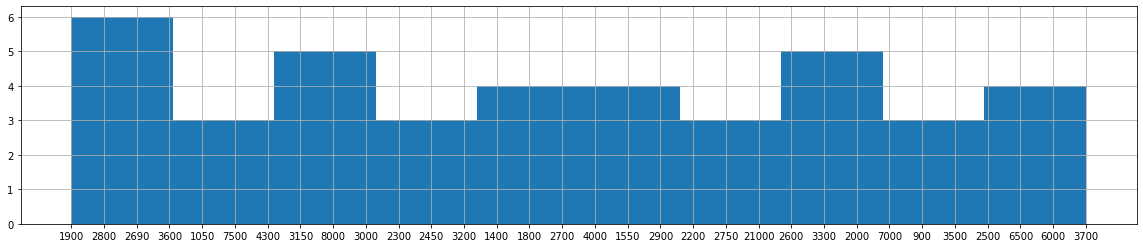

In [46]:
df_teste.aluguel.hist(figsize=[20,4],)

In [50]:
df_teste.head(40)              

,aluguel,quartos,endereco,banheiro,vaga,area,bairro,rua
0,1900,2,"Rua Cônego Vicente Miguel Marino, 29 - Barra F...",1,--,33,Barra Funda,"Rua Cônego Vicente Miguel Marino, 29"
1,2800,1,"Rua Almirante Brasil, 243 - Móoca, São Paulo - SP",2,1,70,Móoca,"Rua Almirante Brasil, 243"
2,2690,2,"Rua Doutor Diogo de Faria, 929 - Vila Clementi...",2,1,73,Vila Clementino,"Rua Doutor Diogo de Faria, 929"
3,3600,1,"Rua Gomes de Carvalho, 1146 - Vila Olímpia, Sã...",1,1,35,Vila Olímpia,"Rua Gomes de Carvalho, 1146"
4,1050,1,"Centro, São Paulo - SP",1,--,38,SP,"Centro, São Paulo"
5,7500,3,"Rua José Maria Lisboa, 514 - Jardins, São Paul...",3,2,115,Jardins,"Rua José Maria Lisboa, 514"
6,4300,1,"Rua Gabriele D'Annunzio, 624 - Campo Belo, São...",1,1,53,Campo Belo,"Rua Gabriele D'Annunzio, 624"
7,3150,1,"Rua Castilho, 155 - Brooklin, São Paulo - SP",1,1,47,Brooklin,"Rua Castilho, 155"
8,2800,1,"Rua Vapabussu, 66 - Campo Belo, São Paulo - SP",2,1,47,Campo Belo,"Rua Vapabussu, 66"
9,8000,2,"Rua Professor Vahia de Abreu, 41 - Vila Olímpi...",3,2,98,Vila Olímpia,"Rua Professor Vahia de Abreu, 41"


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


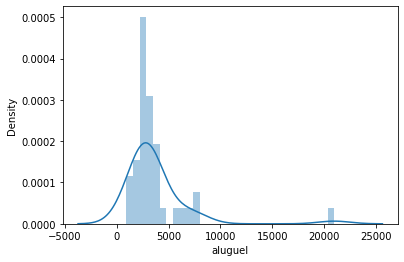

In [51]:
import seaborn as sns
sns.distplot(df_teste['aluguel']);

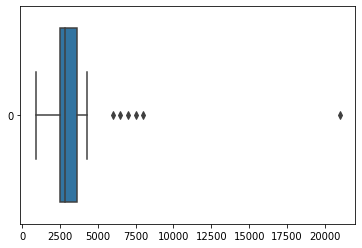

In [52]:
sns.boxplot(data=df_teste['aluguel'], orient='horizontal')

Text(0, 0.5, 'Aluguel')

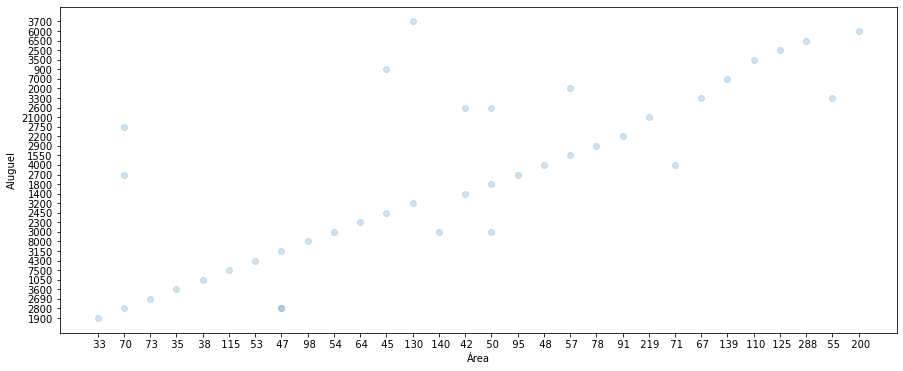

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
plt.scatter(df_teste['area'], df_teste['aluguel'], alpha=0.2)
plt.xlabel('Área')
plt.ylabel('Aluguel')

In [56]:
sns.pairplot(df_teste, kind='reg')

ValueError: ignored

In [57]:
df_teste.head()

,aluguel,quartos,endereco,banheiro,vaga,area,bairro,rua
0,1900,2,"Rua Cônego Vicente Miguel Marino, 29 - Barra F...",1,--,33,Barra Funda,"Rua Cônego Vicente Miguel Marino, 29"
1,2800,1,"Rua Almirante Brasil, 243 - Móoca, São Paulo - SP",2,1,70,Móoca,"Rua Almirante Brasil, 243"
2,2690,2,"Rua Doutor Diogo de Faria, 929 - Vila Clementi...",2,1,73,Vila Clementino,"Rua Doutor Diogo de Faria, 929"
3,3600,1,"Rua Gomes de Carvalho, 1146 - Vila Olímpia, Sã...",1,1,35,Vila Olímpia,"Rua Gomes de Carvalho, 1146"
4,1050,1,"Centro, São Paulo - SP",1,--,38,SP,"Centro, São Paulo"
